In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn
from scipy.io import loadmat

<IPython.core.display.Javascript object>

In [2]:
def read_HSI():
    X=loadmat('KSC.mat')['KSC']
    y=loadmat('KSC_gt.mat')['KSC_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X,y
X,y=read_HSI()

X shape: (512, 614, 176)
y shape: (512, 614)


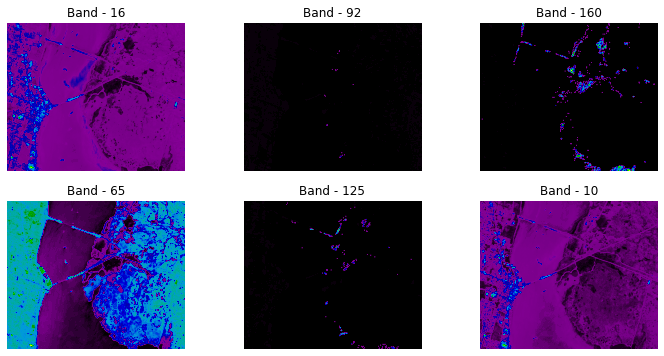

In [3]:
%matplotlib inline
fig=plt.figure(figsize=(12,6))

for i in range(1,1+6):
    fig.add_subplot(2,3,i)
    q= np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q],cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('KSC_Bands.png')

# Ground Truth

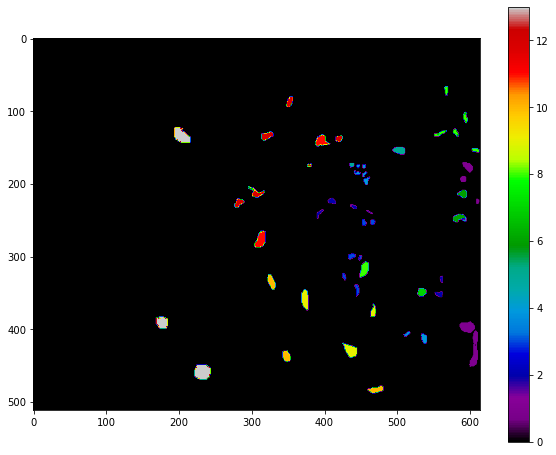

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(y,cmap='nipy_spectral')
plt.colorbar()
plt.savefig('KSC_gt.png')

In [5]:
def extract_pixels(X,y):
    q=X.reshape(-1,X.shape[2])
    df=pd.DataFrame(data=q)
    df=pd.concat([df,pd.DataFrame(data=y.ravel())],axis=1)
    df.columns=[f'band {i}' for i in range(1,1+X.shape[2])]+['class']
    df.to_csv('KSC_df.csv')
    return df
df=extract_pixels(X,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
df.head()

,band 1,band 2,band 3,band 4,band 5,band 6,band 7,band 8,band 9,band 10,...,band 168,band 169,band 170,band 171,band 172,band 173,band 174,band 175,band 176,class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314368 entries, 0 to 314367
Columns: 177 entries, band 1 to class
dtypes: uint16(176), uint8(1)
memory usage: 105.8 MB


In [8]:
df.describe()

,band 1,band 2,band 3,band 4,band 5,band 6,band 7,band 8,band 9,band 10,...,band 168,band 169,band 170,band 171,band 172,band 173,band 174,band 175,band 176,class
count,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.00000,314368.000000,314368.000000,314368.000000,...,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000
mean,1458.848995,34.780630,28.230567,30.532287,31.271503,33.324925,34.89888,39.064227,40.316050,42.478582,...,679.135465,442.845627,689.850704,794.370671,540.067310,596.199216,1574.710215,904.875407,1424.507959,0.129787
std,9614.216153,17.146995,118.113793,509.573301,18.868027,19.745287,20.51392,21.772768,22.711327,23.827604,...,6380.082698,5039.451678,6430.050312,6943.456348,5641.783598,5962.415276,9890.633274,7451.376064,9419.351481,1.142138
min,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,5.00000,9.000000,10.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,26.000000,20.000000,19.000000,23.000000,24.000000,25.00000,28.000000,29.000000,31.000000,...,20.000000,20.000000,21.000000,19.000000,18.000000,20.000000,18.000000,18.000000,15.000000,0.000000
50%,15.000000,32.000000,25.000000,23.000000,28.000000,30.000000,31.00000,35.000000,35.000000,38.000000,...,40.000000,40.000000,39.000000,37.000000,37.000000,36.000000,33.000000,33.000000,30.000000,0.000000
75%,19.000000,37.000000,30.000000,29.000000,34.000000,36.000000,39.00000,43.000000,45.000000,47.000000,...,63.000000,64.000000,64.000000,60.000000,61.000000,59.000000,57.000000,55.000000,49.250000,0.000000
max,65535.000000,461.000000,65535.000000,65535.000000,477.000000,495.000000,509.00000,539.000000,558.000000,578.000000,...,65535.000000,65535.000000,65534.000000,65534.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,13.000000


In [9]:
df['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

# PCA

Text(0, 0.5, 'Cumulative Explained Variance ')

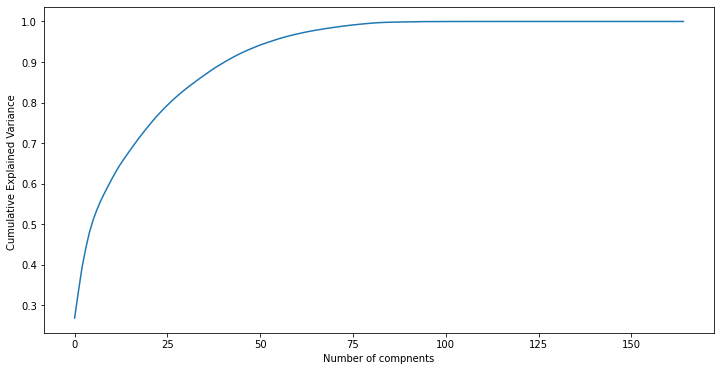

In [10]:
from sklearn.decomposition import PCA
pca= PCA(n_components=165)
pc=pca.fit_transform(df.iloc[:,:-1].values)
evr=pca.explained_variance_ratio_
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(evr))
plt.xlabel('Number of compnents')
plt.ylabel('Cumulative Explained Variance ')

In [13]:
a=y.ravel()
np.unique(a, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=uint8),
 array([309157,    761,    243,    256,    252,    161,    229,    105,
           431,    520,    404,    419,    503,    927], dtype=int64))

In [14]:
pca= PCA(n_components=80)
dt=pca.fit_transform(df.iloc[:,:-1].values)
q=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range (1,81)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789160,...,216.429390,-20.241403,23.115048,291.058916,9.006015,69.776795,156.840784,218.135409,-10.724409,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447767,...,158.722755,-29.229620,-10.558822,195.662038,-0.632222,44.930262,117.276381,155.420857,-11.380256,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,122.164625,-23.238615,-17.254031,139.269444,-1.230166,31.762603,86.371439,112.681495,-8.068951,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,164.351272,3.599286,58.386680,238.077688,18.313392,69.843523,110.382219,165.479700,-4.777930,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717462,120.883225,65.498572,...,334.152375,5.969911,117.073260,505.154357,35.065424,144.028549,231.001498,352.773555,-8.242040,0


In [16]:
q['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

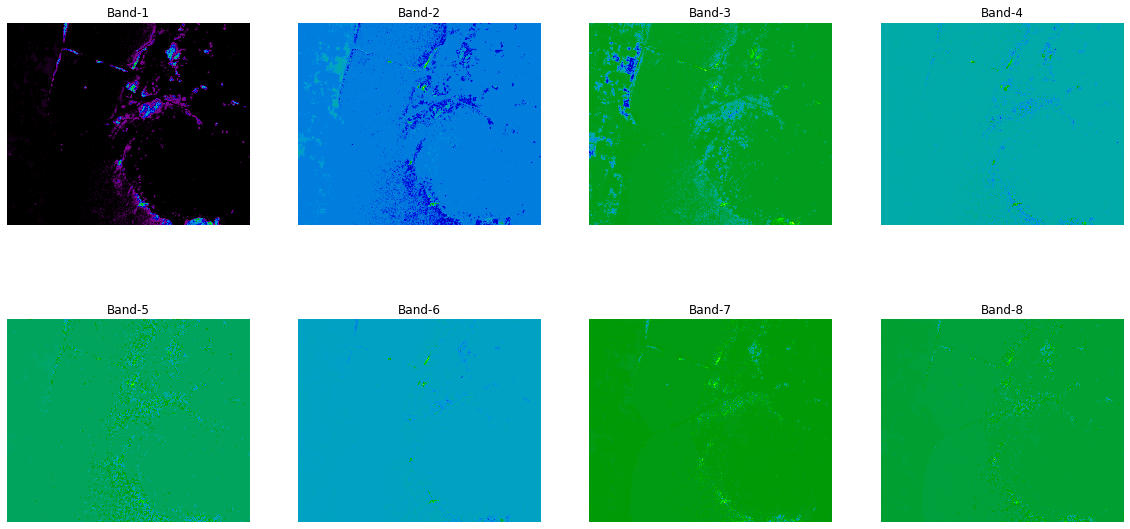

In [17]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(q.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA(80)_Bands.png')

In [15]:
q.to_csv('KSC_80_PCA.csv',index=False)

In [18]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789160,...,216.429390,-20.241403,23.115048,291.058916,9.006015,69.776795,156.840784,218.135409,-10.724409,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447767,...,158.722755,-29.229620,-10.558822,195.662038,-0.632222,44.930262,117.276381,155.420857,-11.380256,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,122.164625,-23.238615,-17.254031,139.269444,-1.230166,31.762603,86.371439,112.681495,-8.068951,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,164.351272,3.599286,58.386680,238.077688,18.313392,69.843523,110.382219,165.479700,-4.777930,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717462,120.883225,65.498572,...,334.152375,5.969911,117.073260,505.154357,35.065424,144.028549,231.001498,352.773555,-8.242040,0


In [19]:
q['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

# SVM

In [20]:
x80=q[q['class']!=0]
X80=x80.iloc[:,:-1].values
y80=x80.loc[:,'class'].values

In [22]:
X80.shape,y80.shape,X.shape,y.shape

((5211, 80), (5211,), (512, 614, 176), (512, 614))

In [25]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X80,y80,random_state=11,stratify=y80)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [26]:
ypred=svm.predict(X_test)

In [27]:
len(np.unique(names))

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

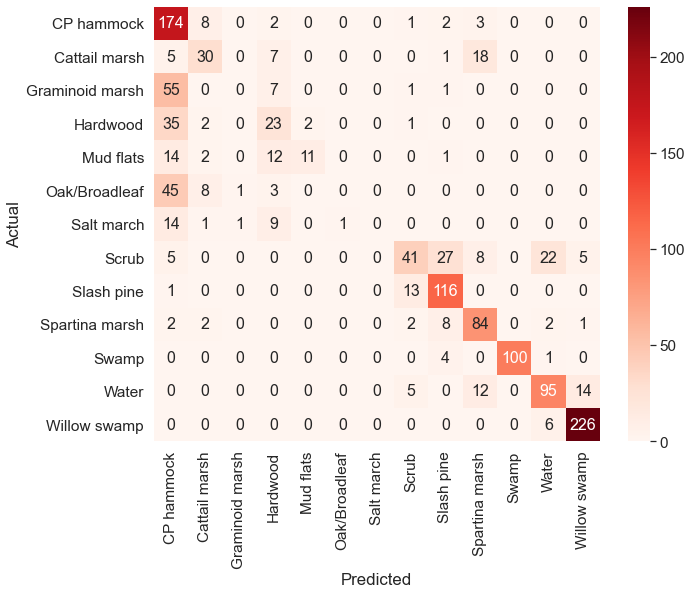

In [28]:
data80=confusion_matrix (y_test,ypred)
df_cm80=pd.DataFrame(data80,columns=np.unique(names),index=np.unique(names))
df_cm80.index.name='Actual'
df_cm80.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm80,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
plt.savefig('cmap.png',dpi=300)

In [29]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.50      0.92      0.64       190
   Willow swamp       0.57      0.49      0.53        61
     CP hammock       0.00      0.00      0.00        64
     Slash pine       0.37      0.37      0.37        63
  Oak/Broadleaf       0.85      0.28      0.42        40
       Hardwood       0.00      0.00      0.00        57
          Swamp       0.00      0.00      0.00        26
Graminoid marsh       0.64      0.38      0.48       108
 Spartina marsh       0.72      0.89      0.80       130
  Cattail marsh       0.67      0.83      0.74       101
     Salt march       1.00      0.95      0.98       105
      Mud flats       0.75      0.75      0.75       126
          Water       0.92      0.97      0.95       232

       accuracy                           0.69      1303
      macro avg       0.54      0.53      0.51      1303
   weighted avg       0.64      0.69      0.65      1303



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
df['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

In [31]:
[f'PC-{i}' for i in range (1,5)]+['class']

['PC-1', 'PC-2', 'PC-3', 'PC-4', 'class']

# PCA=75

In [32]:
from sklearn.decomposition import PCA
pca= PCA(n_components=75)
dt=pca.fit_transform(df.iloc[:,:-1].values)
dd=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
dd.columns=[f'PC-{i}' for i in range (1,76)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
dd.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-67,PC-68,PC-69,PC-70,PC-71,PC-72,PC-73,PC-74,PC-75,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828625,28.145806,24.789157,...,117.333761,57.712224,83.770072,14.516253,-83.073281,216.553889,-20.236033,22.711099,291.627756,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651879,-44.361791,-38.483109,-8.630921,20.447764,...,80.542246,31.348660,62.241712,12.283171,-54.100138,158.842559,-29.236920,-10.899001,196.167293,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931945,-64.266461,-39.738933,24.038101,...,62.685900,18.825139,45.897110,12.563055,-37.937230,122.272070,-23.256182,-17.524705,139.699701,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091342,48.827561,...,103.790560,61.709643,66.548134,9.781731,-72.124766,164.377929,3.644212,58.194655,238.271222,0
4,-2596.900801,1080.140104,1891.387936,600.011995,236.934730,634.215976,238.641341,143.717463,120.883226,65.498568,...,202.124853,128.686861,134.012011,18.443809,-145.512397,334.268925,6.016532,116.568629,505.781379,0


In [34]:
dd['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

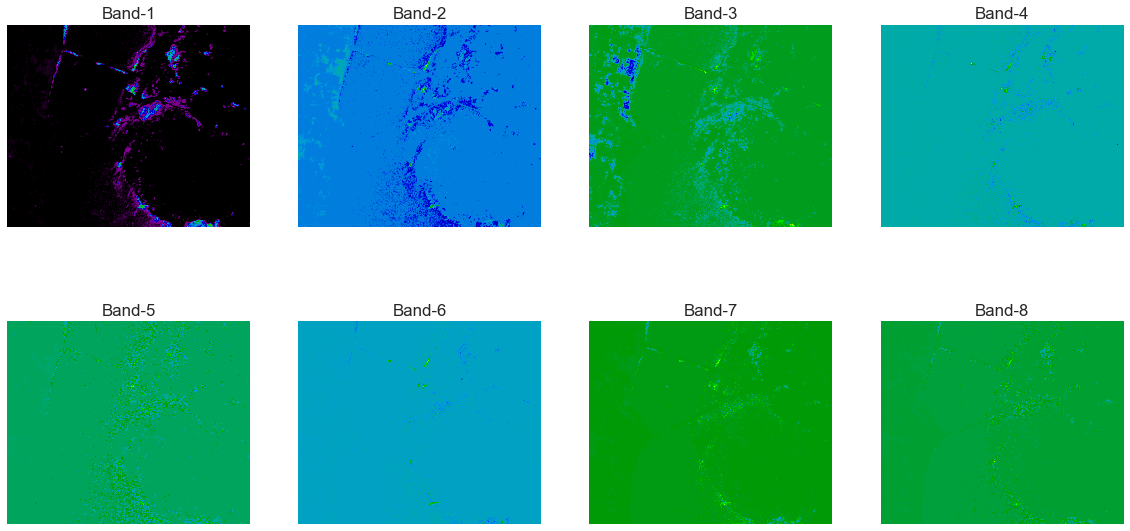

In [35]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(dd.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA(70)_Bands.png')

In [36]:
q.to_csv('KSC_70_PCA.csv',index=False)

In [37]:
dd.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-67,PC-68,PC-69,PC-70,PC-71,PC-72,PC-73,PC-74,PC-75,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828625,28.145806,24.789157,...,117.333761,57.712224,83.770072,14.516253,-83.073281,216.553889,-20.236033,22.711099,291.627756,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651879,-44.361791,-38.483109,-8.630921,20.447764,...,80.542246,31.348660,62.241712,12.283171,-54.100138,158.842559,-29.236920,-10.899001,196.167293,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931945,-64.266461,-39.738933,24.038101,...,62.685900,18.825139,45.897110,12.563055,-37.937230,122.272070,-23.256182,-17.524705,139.699701,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091342,48.827561,...,103.790560,61.709643,66.548134,9.781731,-72.124766,164.377929,3.644212,58.194655,238.271222,0
4,-2596.900801,1080.140104,1891.387936,600.011995,236.934730,634.215976,238.641341,143.717463,120.883226,65.498568,...,202.124853,128.686861,134.012011,18.443809,-145.512397,334.268925,6.016532,116.568629,505.781379,0


In [38]:
dd['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

# SVM

In [39]:
x70=q[q['class']!=0]
X70=x70.iloc[:,:-1].values
y70=x70.loc[:,'class'].values

In [40]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X70,y70,random_state=11,stratify=y70)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [41]:
ypred=svm.predict(X_test)

In [42]:
len(np.unique(names))

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

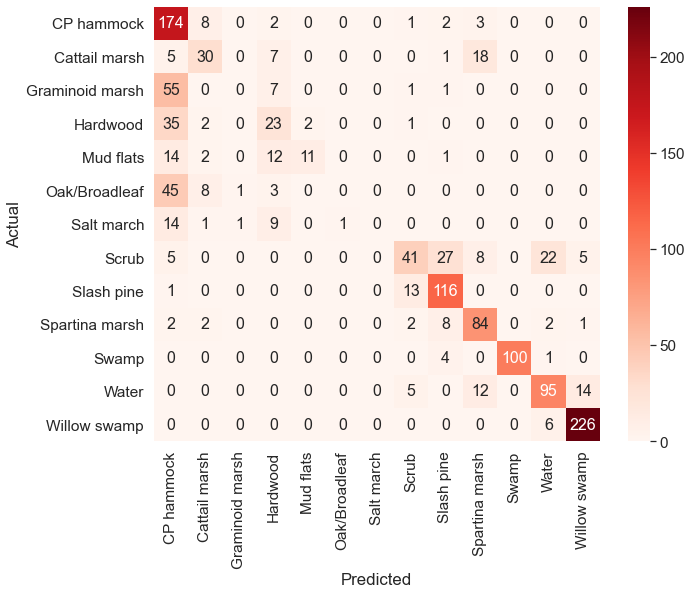

In [44]:
data=confusion_matrix (y_test,ypred)
df_cm75=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm75.index.name='Actual'
df_cm75.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm75,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [45]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.50      0.92      0.64       190
   Willow swamp       0.57      0.49      0.53        61
     CP hammock       0.00      0.00      0.00        64
     Slash pine       0.37      0.37      0.37        63
  Oak/Broadleaf       0.85      0.28      0.42        40
       Hardwood       0.00      0.00      0.00        57
          Swamp       0.00      0.00      0.00        26
Graminoid marsh       0.64      0.38      0.48       108
 Spartina marsh       0.72      0.89      0.80       130
  Cattail marsh       0.67      0.83      0.74       101
     Salt march       1.00      0.95      0.98       105
      Mud flats       0.75      0.75      0.75       126
          Water       0.92      0.97      0.95       232

       accuracy                           0.69      1303
      macro avg       0.54      0.53      0.51      1303
   weighted avg       0.64      0.69      0.65      1303



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA 90

In [46]:
pca= PCA(n_components=90)
dt=pca.fit_transform(df.iloc[:,:-1].values)
q=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range (1,91)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-82,PC-83,PC-84,PC-85,PC-86,PC-87,PC-88,PC-89,PC-90,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789159,...,23.315516,31.620758,437.070165,-283.901339,-171.342768,-228.727076,-65.510342,-48.988096,-31.701353,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447766,...,9.798308,12.776068,320.623762,-218.329589,-130.462177,-179.101461,-55.631931,-39.061309,-36.996280,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,7.054402,4.727963,240.978502,-166.494375,-101.606016,-137.644880,-42.766580,-28.911974,-33.471658,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,28.608253,38.856242,312.651867,-190.805443,-111.013247,-125.066230,-22.084545,-32.788479,-21.279162,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883226,65.498572,...,58.352062,86.302337,692.304576,-418.786903,-255.907673,-317.415150,-78.750649,-70.388256,-26.993159,0


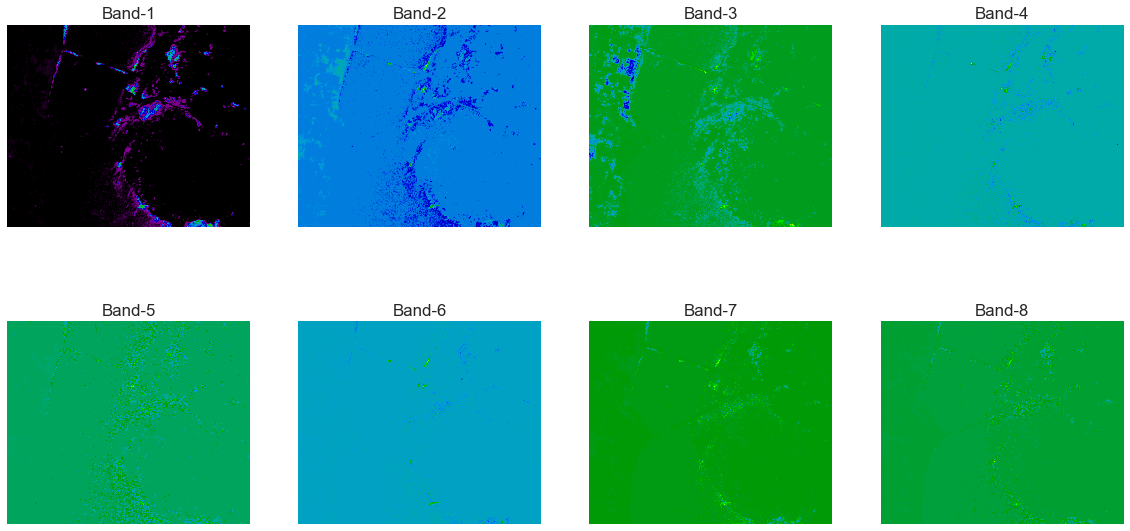

In [48]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(q.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA_Bands.png')

In [31]:
q.to_csv('KSC_90_PCA.csv',index=False)

In [32]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828624,28.145804,24.789159,...,216.408632,-20.262946,23.168726,291.094194,9.011089,69.881294,156.851795,217.981085,-10.647208,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630922,20.447766,...,158.708840,-29.245330,-10.517585,195.685986,-0.627042,45.013388,117.286169,155.302078,-11.326995,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738934,24.038102,...,122.152684,-23.251265,-17.220770,139.290504,-1.228411,31.830087,86.382597,112.584840,-8.018914,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827562,...,164.332106,3.585999,58.424809,238.108590,18.308620,69.917170,110.390532,165.373356,-4.703925,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883224,65.498571,...,334.118420,5.938807,117.151072,505.210064,35.068533,144.176401,231.014435,352.552893,-8.118440,0


# SVM

In [49]:
x90=q[q['class']!=0]
X90=x90.iloc[:,:-1].values
y90=x90.loc[:,'class'].values

In [50]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X90,y90,random_state=11,stratify=y90)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [51]:
ypred=svm.predict(X_test)

In [52]:
len(np.unique(names))

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

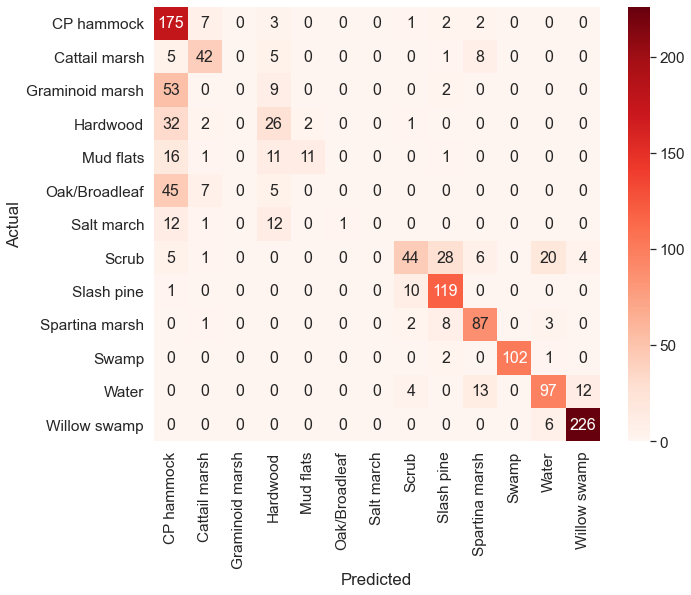

In [53]:
data=confusion_matrix (y_test,ypred)
df_cm90=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm90.index.name='Actual'
df_cm90.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm90,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [54]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.51      0.92      0.66       190
   Willow swamp       0.68      0.69      0.68        61
     CP hammock       0.00      0.00      0.00        64
     Slash pine       0.37      0.41      0.39        63
  Oak/Broadleaf       0.85      0.28      0.42        40
       Hardwood       0.00      0.00      0.00        57
          Swamp       0.00      0.00      0.00        26
Graminoid marsh       0.71      0.41      0.52       108
 Spartina marsh       0.73      0.92      0.81       130
  Cattail marsh       0.75      0.86      0.80       101
     Salt march       1.00      0.97      0.99       105
      Mud flats       0.76      0.77      0.77       126
          Water       0.93      0.97      0.95       232

       accuracy                           0.71      1303
      macro avg       0.56      0.55      0.54      1303
   weighted avg       0.66      0.71      0.67      1303



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA 100

In [55]:
pca= PCA(n_components=100)
dt=pca.fit_transform(df.iloc[:,:-1].values)
q=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range (1,101)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-92,PC-93,PC-94,PC-95,PC-96,PC-97,PC-98,PC-99,PC-100,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789159,...,28.672096,-22.220575,-5.555774,-56.279516,18.260516,-8.999778,-20.447571,-21.367435,-2.256085,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447766,...,19.404573,-18.652410,-4.240079,-42.914184,9.207690,-20.239686,-22.936717,-8.555871,-4.783226,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,15.819776,-18.296263,-3.371340,-31.844511,5.964224,-21.004265,-16.680642,-4.640543,-4.010719,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,19.204302,-17.495923,-1.414981,-30.820293,19.549202,28.112812,4.980126,-25.409298,11.783483,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883226,65.498572,...,41.824468,-28.137993,-7.698960,-78.362345,40.460065,37.833588,-12.710915,-51.739124,10.983178,0


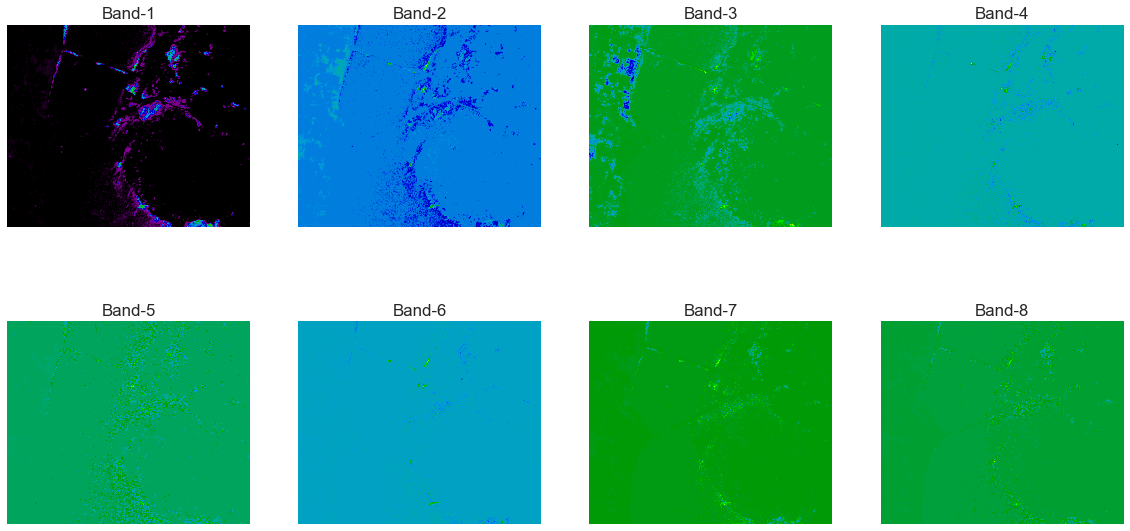

In [57]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(q.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA_Bands.png')

In [31]:
q.to_csv('KSC_80_PCA.csv',index=False)

In [32]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828624,28.145804,24.789159,...,216.408632,-20.262946,23.168726,291.094194,9.011089,69.881294,156.851795,217.981085,-10.647208,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630922,20.447766,...,158.708840,-29.245330,-10.517585,195.685986,-0.627042,45.013388,117.286169,155.302078,-11.326995,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738934,24.038102,...,122.152684,-23.251265,-17.220770,139.290504,-1.228411,31.830087,86.382597,112.584840,-8.018914,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827562,...,164.332106,3.585999,58.424809,238.108590,18.308620,69.917170,110.390532,165.373356,-4.703925,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883224,65.498571,...,334.118420,5.938807,117.151072,505.210064,35.068533,144.176401,231.014435,352.552893,-8.118440,0


# SVM

In [58]:
x100=q[q['class']!=0]
X100=x100.iloc[:,:-1].values
y100=x100.loc[:,'class'].values

In [59]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X100,y100,random_state=11,stratify=y100)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [60]:
ypred=svm.predict(X_test)

In [61]:
len(np.unique(names))

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

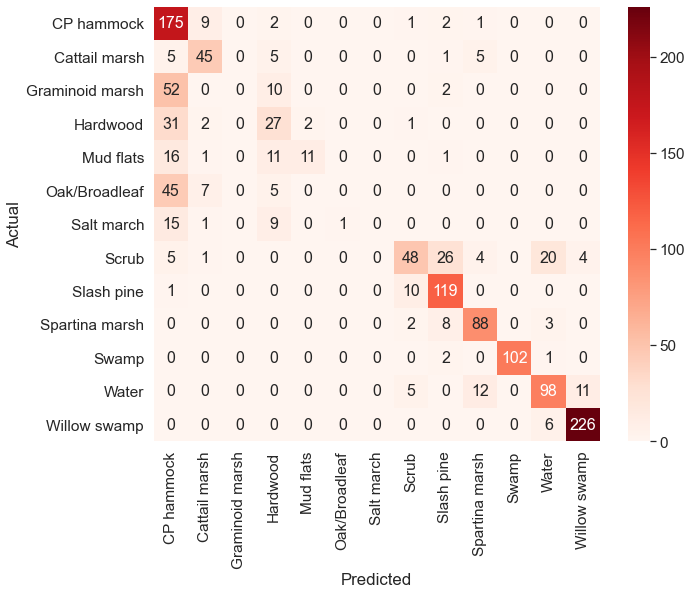

In [62]:
data=confusion_matrix (y_test,ypred)
df_cm100=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm100.index.name='Actual'
df_cm100.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm100,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [63]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.51      0.92      0.65       190
   Willow swamp       0.68      0.74      0.71        61
     CP hammock       0.00      0.00      0.00        64
     Slash pine       0.39      0.43      0.41        63
  Oak/Broadleaf       0.85      0.28      0.42        40
       Hardwood       0.00      0.00      0.00        57
          Swamp       0.00      0.00      0.00        26
Graminoid marsh       0.72      0.44      0.55       108
 Spartina marsh       0.74      0.92      0.82       130
  Cattail marsh       0.80      0.87      0.83       101
     Salt march       1.00      0.97      0.99       105
      Mud flats       0.77      0.78      0.77       126
          Water       0.94      0.97      0.96       232

       accuracy                           0.72      1303
      macro avg       0.57      0.56      0.55      1303
   weighted avg       0.67      0.72      0.68      1303



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA 110

In [64]:
pca= PCA(n_components=110)
dt=pca.fit_transform(df.iloc[:,:-1].values)
q=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range (1,111)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-102,PC-103,PC-104,PC-105,PC-106,PC-107,PC-108,PC-109,PC-110,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789159,...,1.917879,-0.632867,-65.019972,4.051488,12.321803,6.510719,-7.157524,2.261148,-4.686936,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447766,...,-14.443792,3.475146,-132.073090,9.497004,5.771853,18.829906,-8.013885,3.974175,1.084000,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,-10.403055,3.510274,-136.672061,10.855388,4.929917,20.161032,-9.213237,3.508615,1.608802,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,35.378546,-10.146520,-10.428423,-0.226584,29.982991,-3.595955,-6.202903,3.474013,-17.296264,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883226,65.498572,...,50.850190,-17.431641,50.976277,-1.254128,41.600095,-15.568904,-9.369012,3.352981,-27.242050,0


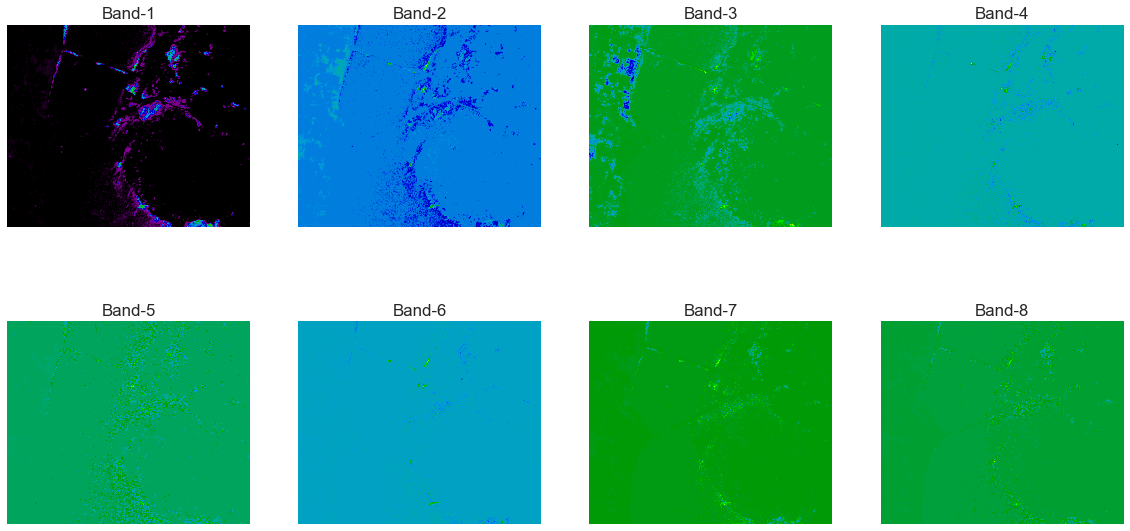

In [66]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(q.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA_Bands.png')

In [31]:
q.to_csv('KSC_80_PCA.csv',index=False)

In [32]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828624,28.145804,24.789159,...,216.408632,-20.262946,23.168726,291.094194,9.011089,69.881294,156.851795,217.981085,-10.647208,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630922,20.447766,...,158.708840,-29.245330,-10.517585,195.685986,-0.627042,45.013388,117.286169,155.302078,-11.326995,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738934,24.038102,...,122.152684,-23.251265,-17.220770,139.290504,-1.228411,31.830087,86.382597,112.584840,-8.018914,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827562,...,164.332106,3.585999,58.424809,238.108590,18.308620,69.917170,110.390532,165.373356,-4.703925,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883224,65.498571,...,334.118420,5.938807,117.151072,505.210064,35.068533,144.176401,231.014435,352.552893,-8.118440,0


# SVM

In [67]:
x110=q[q['class']!=0]
X110=x110.iloc[:,:-1].values
y110=x110.loc[:,'class'].values

In [68]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X110,y110,random_state=11,stratify=y110)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [69]:
ypred=svm.predict(X_test)

In [70]:
len(np.unique(names))

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

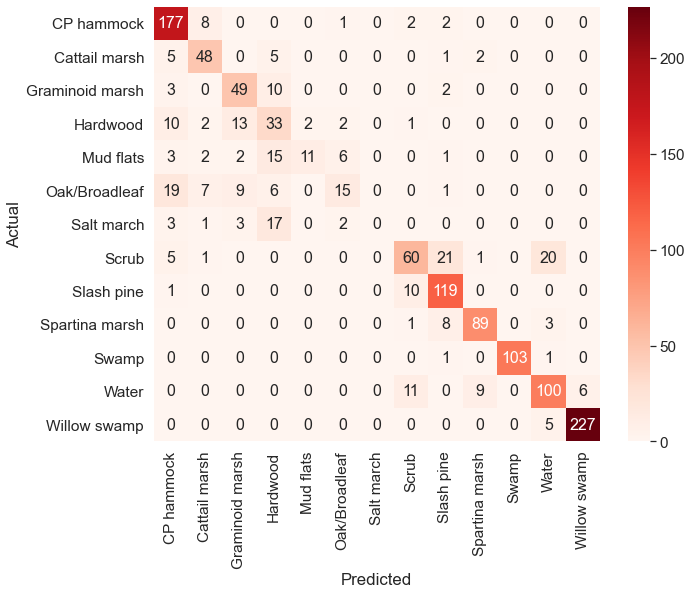

In [71]:
data=confusion_matrix (y_test,ypred)
df_cm110=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm110.index.name='Actual'
df_cm110.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm110,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [72]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.78      0.93      0.85       190
   Willow swamp       0.70      0.79      0.74        61
     CP hammock       0.64      0.77      0.70        64
     Slash pine       0.38      0.52      0.44        63
  Oak/Broadleaf       0.85      0.28      0.42        40
       Hardwood       0.58      0.26      0.36        57
          Swamp       0.00      0.00      0.00        26
Graminoid marsh       0.71      0.56      0.62       108
 Spartina marsh       0.76      0.92      0.83       130
  Cattail marsh       0.88      0.88      0.88       101
     Salt march       1.00      0.98      0.99       105
      Mud flats       0.78      0.79      0.78       126
          Water       0.97      0.98      0.98       232

       accuracy                           0.79      1303
      macro avg       0.69      0.67      0.66      1303
   weighted avg       0.78      0.79      0.78      1303



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA 120

In [73]:
pca= PCA(n_components=120)
dt=pca.fit_transform(df.iloc[:,:-1].values)
q=pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range (1,121)]+['class']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-112,PC-113,PC-114,PC-115,PC-116,PC-117,PC-118,PC-119,PC-120,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990135,17.828624,28.145805,24.789159,...,-6.850474,5.055789,9.792431,-5.089088,7.837175,-4.827277,-1.268344,4.890309,-0.134487,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630921,20.447766,...,-2.002894,1.027399,8.239904,-8.796264,2.837925,-3.957716,1.490863,3.578077,-1.541652,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738933,24.038102,...,-0.090117,0.732892,8.643830,-13.053122,2.602740,-1.662254,4.268581,4.421895,-5.650457,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827563,...,-14.395488,6.839167,11.696144,-8.708897,9.532292,2.237011,-2.338498,-4.231988,-5.960219,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883226,65.498572,...,-19.447385,9.067682,15.775532,-0.808328,13.686707,2.811745,-4.511741,0.950019,0.333274,0


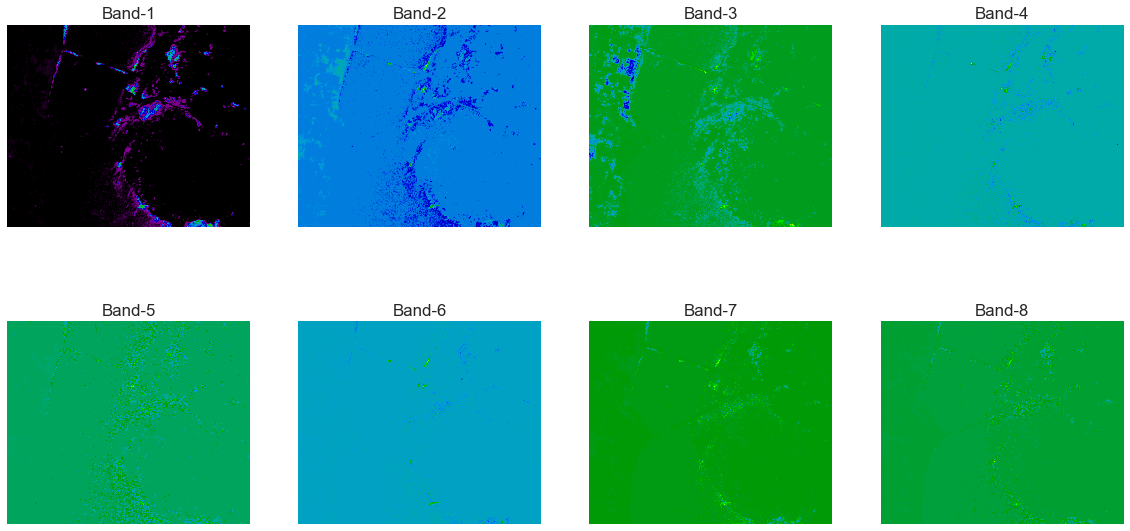

In [75]:
fig=plt.figure(figsize=(20,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    plt.imshow(q.loc[:,f'PC-{i}'].values.reshape(512, 614),cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band-{i}')
plt.savefig('KSC_PCA_Bands.png')

In [31]:
q.to_csv('KSC_80_PCA.csv',index=False)

In [32]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,class
0,-3331.597574,654.059763,1637.411443,324.810130,119.808763,180.346131,37.990134,17.828624,28.145804,24.789159,...,216.408632,-20.262946,23.168726,291.094194,9.011089,69.881294,156.851795,217.981085,-10.647208,0
1,-3552.851134,512.116447,1563.009511,226.053447,75.440660,5.651878,-44.361791,-38.483110,-8.630922,20.447766,...,158.708840,-29.245330,-10.517585,195.685986,-0.627042,45.013388,117.286169,155.302078,-11.326995,0
2,-3502.131691,485.191668,1557.214895,224.727796,71.541531,-56.783265,-92.931944,-64.266462,-39.738934,24.038102,...,122.152684,-23.251265,-17.220770,139.290504,-1.228411,31.830087,86.382597,112.584840,-8.018914,0
3,-3003.419096,784.559350,1725.550591,411.043548,153.232257,254.410859,63.207101,26.132800,24.091341,48.827562,...,164.332106,3.585999,58.424809,238.108590,18.308620,69.917170,110.390532,165.373356,-4.703925,0
4,-2596.900801,1080.140104,1891.387936,600.011996,236.934729,634.215976,238.641341,143.717461,120.883224,65.498571,...,334.118420,5.938807,117.151072,505.210064,35.068533,144.176401,231.014435,352.552893,-8.118440,0


# SVM

In [76]:
x120=q[q['class']!=0]
X120=x120.iloc[:,:-1].values
y120=x120.loc[:,'class'].values

In [77]:
names=['Scrub','Willow swamp','CP hammock','Slash pine','Oak/Broadleaf','Hardwood','Swamp','Graminoid marsh','Spartina marsh','Cattail marsh','Salt march','Mud flats','Water']
X_train, X_test, y_train,y_test=train_test_split(X120,y120,random_state=11,stratify=y120)
svm=SVC(C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)

SVC(C=100, cache_size=10240)

In [78]:
ypred=svm.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

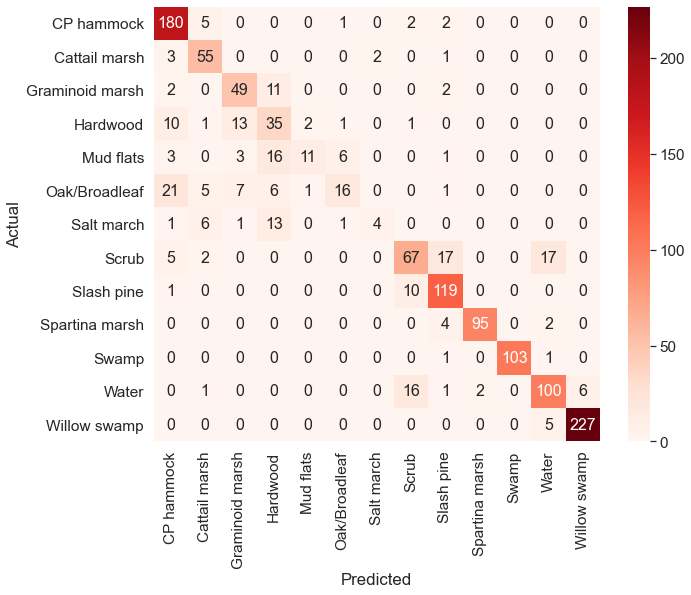

In [79]:
data=confusion_matrix (y_test,ypred)
df_cm120=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm120.index.name='Actual'
df_cm120.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm120,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [80]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.80      0.95      0.87       190
   Willow swamp       0.73      0.90      0.81        61
     CP hammock       0.67      0.77      0.72        64
     Slash pine       0.43      0.56      0.49        63
  Oak/Broadleaf       0.79      0.28      0.41        40
       Hardwood       0.64      0.28      0.39        57
          Swamp       0.67      0.15      0.25        26
Graminoid marsh       0.70      0.62      0.66       108
 Spartina marsh       0.80      0.92      0.85       130
  Cattail marsh       0.98      0.94      0.96       101
     Salt march       1.00      0.98      0.99       105
      Mud flats       0.80      0.79      0.80       126
          Water       0.97      0.98      0.98       232

       accuracy                           0.81      1303
      macro avg       0.77      0.70      0.70      1303
   weighted avg       0.81      0.81      0.80      1303

